# Loading DataSet of the Books




In [2]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
#files have been downloaded and saved in the working directory
#reading the file as pandas dataframe
books = pd.read_csv("books.csv")
reviews = pd.read_csv("book_reviews.csv")

In [ ]:
#checking the format of the dataframe
books.head()

,Unnamed: 0,book title,book price,rating,author,year of publication,genre
0,0,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance
1,1,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir
2,2,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography
3,3,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir
4,4,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction"


In [4]:
#droping the unnamed column (not neeeded)
books = books.drop(books.columns[0], axis =1)
reviews = reviews.drop(reviews.columns[0], axis =1)

In [ ]:
#checking the dataframe again
books.head()

,book title,book price,rating,author,year of publication,genre
0,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance
1,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir
2,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography
3,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir
4,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction"


# 1. relation between price of the book and its ratings


In [ ]:
#removing the null values before checking the relations
df_price_ratings = books[['book price', 'rating']].dropna()
book_prices = df_price_ratings['book price']
ratings = df_price_ratings['rating']

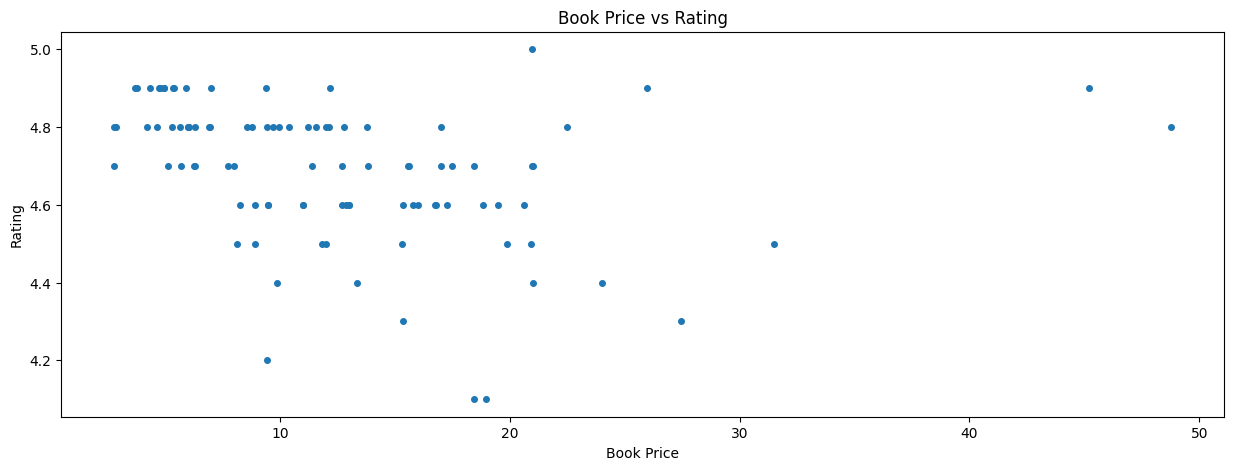

In [ ]:
#visualing the variables using scatter plot
plt.figure(figsize=(15, 5))
plt.scatter(book_prices, ratings, s = 16)
plt.title('Book Price vs Rating')
plt.xlabel('Book Price')
plt.ylabel('Rating')
plt.show()

From the plot, we can observe the following points:
1. Most of the low priced books are rated high
2. for the mid priced books, ratings are distributed, but there are few books with very high rating
3. Let's verify this from the statistical variables
But we can we see some books are too costlier than rest of the books and can skew the data, so lets remove the outliers

In [ ]:
#removing outliers from price
mean, std = book_prices.mean(), book_prices.std()
upper_bound, lower_bound = mean + 3*std, mean - 3*std

In [ ]:
#redefining the variables after removing the
df_price_ratings = df_price_ratings[(df_price_ratings['book price']<=upper_bound) & (df_price_ratings['book price']>=lower_bound)]
book_prices = df_price_ratings['book price']
ratings = df_price_ratings['rating']

In [ ]:
#checking the corelation between the variables
correlation_matrix = np.corrcoef(book_prices, ratings)
correlation_coefficient = correlation_matrix[0, 1]
print(f'Correlation coefficient between book price and rating: {correlation_coefficient}')

Correlation coefficient between book price and rating: -0.4769825368303085


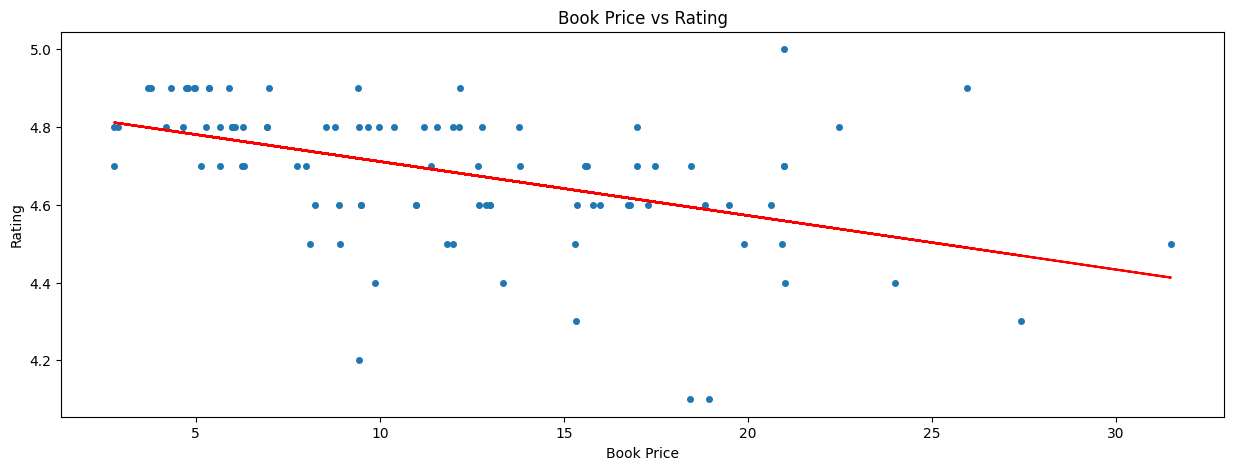

In [ ]:
#trying to fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(book_prices, ratings)

plt.figure(figsize=(15, 5))
plt.scatter(book_prices, ratings, s = 16)
plt.plot(book_prices, intercept + slope * book_prices, 'r', label='regression line')
plt.title('Book Price vs Rating')
plt.xlabel('Book Price')
plt.ylabel('Rating')
plt.show()

In [ ]:
print(correlation_coefficient, r_value, p_value, std_err )

-0.4769825368303085 -0.47698253683030856 1.0247804399509082e-06 0.0026527825577722015


Based on the above statistical variables, we can conclude the following:

Negative Correlation: The correlation coefficient (r-value) of -0.4769 indicates a moderate negative relationship between book prices and ratings. This suggests that, generally, higher-priced books tend to have lower ratings, although this is not a strong rule.

The p-value of 1.0247e-06 is much smaller than the typical significance level (0.05), indicating that the negative correlation observed is statistically significant. Thus, we can confidently state that the relationship is not due to random chance.

The standard error (std_err) of 0.002652 is relatively small, which implies that the estimate of the slope is precise. This means that the negative relationship observed is consistent across the data.

While the correlation is statistically significant, it is moderate in strength. This implies that other factors besides price also play significant roles in determining book ratings, such as content quality, genre, author popularity, etc.


---


# 2. genres which have highest rating

In [ ]:
#checking the genres
genres = books['genre']
print(genres.sample(10))

0           Fantasy Romance
1                    Memoir
2             Autobiography
3                    Memoir
4        Childrens, Fiction
5                   Fantasy
6      Nonfiction, Politics
7       Humor, Middle Grade
8    Nonfiction, True Crime
9        Historical Fiction
Name: genre, dtype: object


In [5]:
# as genres are comma seperated, seperating them to get genre wise ratings
exploded_books = books.assign(genre=books['genre'].str.split(',')).explode('genre')
exploded_books = exploded_books.assign(genre=exploded_books['genre'].str.split(';')).explode('genre')
exploded_books['genre'] = exploded_books['genre'].str.strip()
exploded_books['genre'] = exploded_books['genre'].str.title()


In [ ]:
genre_ratings = exploded_books.groupby('genre').agg({'rating': 'mean', 'book title': 'nunique'}).reset_index()
genre_ratings = genre_ratings.sort_values(by='rating', ascending=False)

for i, row in genre_ratings.iloc[:5].iterrows():
  print(f"{i}. {row['genre']} - {row['rating']} - {row['book title']}")

29. Crime - 5.0 - 1
57. Legal Thriller - 5.0 - 1
62. Love - 4.9 - 1
20. Colors - 4.9 - 1
91. Science Fiction &Amp - 4.9 - 1


Here all the genres in the top 5 have only one book which is rated good.
To handle this lets cluster the genres

In [6]:
genre_clusters = {
    "Fiction": ["Adult Fiction", "Contemporary Fiction", "Chick Lit", "Fiction", "Historical Fiction", "Science Fiction", "Science Fiction &Amp"],
    "Mystery": ["Mystery", "Crime", "Legal Thriller", "Suspense", "Thrillers - Suspense", 'True Crime', 'Thriller'],
    "Romance": ["Contemporary Romance", "Romance", "Fantasy Romance", "New Adult", "Young Adult Romance", "Love", "Contemporary"],
    "Literature": ["Literary", "Literary Fiction", "Poetry", "Literature"],
    "Self Help": ["Personal Development", "Personal Growth", "Self Help", "Self-Help", "Self-Improvement", "Leadership", "Health", "Mental Health",  "Personal Finance", "Relationships"],
    "Non-fiction": ["Nonfiction", "Biography", "Memoir", "Autobiography", "History", "Politics", "Economics", "Finance", "Survival Story", "Nutrition", "Money","Medical", "Philosophy", "Psychology", "Business", "Educational Material", "Fitness", "Family"],
    "Fantasy": ["Fantasy", "High Fantasy", "Magic", "Mythology", "Dragons", "Fae"],
    "Childrens": ["Childrens", "Childrens Literature", "Kids Fiction", "Picture Book", "Picture Books", "Middle Grade", "Alphabet", "Counting", "Games", 'Storytime', "Writing", "Number"],
    "Horror and Supernatural": ["Horror", "Spiritual Warfare", "Spirituality", "Dark"],
    "Art": ["Art", "Design", "Crafts", "Music", "Colors"],
    "Cookbooks": ["Cookbook", "Cookbooks", "Cooking"],
    "Religion": ["Christian Theology - Eschatology", "Biblical Studies - Prophecy", "Jewish", "Judaism", "Religion", "Israel"],
    "Adventure and Action": ["Action", "Adventure", "Adventure Novel", "War", "Activities"],
    "Humor": ["Humor"],
    "Audio": ["Audiobook"],
    "Science and Technology": ["Science", "Technology", "Cars And Trucks"],
    "LGBTQ+": ["Lgbt", "Queer"],
    "Holiday": ["Christmas", "Holiday"],
    "Young Adult": ["Young Adult", "Young Adult Novel", "Adult"],
    "Animals and Nature": ["Animals", "Wild Animals","Dinosaurs"],
    "General Topics": ["World Literature - India - General", "Family Life - General"]
}


In [7]:
#map these clusters to the dataframe
genre_to_cluster = {genre: cluster for cluster, genres in genre_clusters.items() for genre in genres}
exploded_books['genre_cluster'] = exploded_books['genre'].map(genre_to_cluster)

In [8]:
cluster_ratings = exploded_books.groupby('genre_cluster').agg({'rating': 'mean', 'book title': 'nunique'}).reset_index()
cluster_ratings = cluster_ratings.sort_values(by='rating', ascending=False)

for i, row in cluster_ratings.iloc[:5].iterrows():
  print(f"{i}. {row['genre_cluster']} - {row['rating']} - {row['book title']}")

1. Animals and Nature - 4.82 - 9
4. Childrens - 4.8 - 39
5. Cookbooks - 4.8 - 2
11. Humor - 4.785714285714286 - 7
2. Art - 4.76 - 3


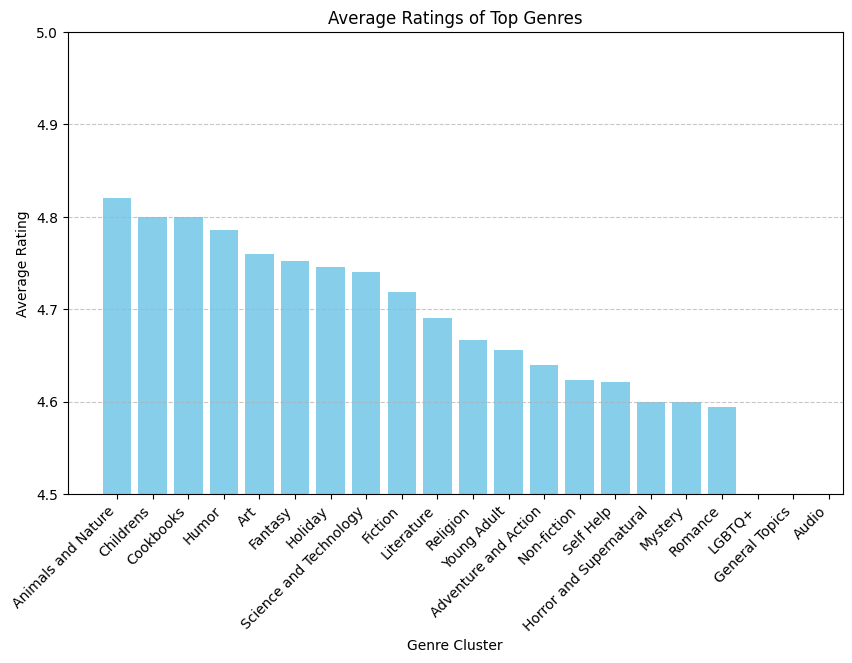

In [10]:
# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(cluster_ratings['genre_cluster'], cluster_ratings['rating'], color='skyblue')
plt.xlabel('Genre Cluster')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Top Genres')
plt.xticks(rotation=45, ha='right')
plt.ylim(4.5, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

From this we can conclude that Animals and Childrens books genre has highest ratings


---

# 3. Popularity and Ratings of author

In [11]:
#%% for popularity of authors, we can say the author which get highest number of reviews will be more popular
reviews = reviews.merge(books[['book title', 'author']], left_on= 'book name', right_on = 'book title', how = 'left')


In [15]:

number_of_reviews = pd.DataFrame(reviews.groupby('author')['review title'].nunique()).reset_index()
number_of_reviews.columns= ['author', 'review_count']

author_ratings = pd.DataFrame(books.groupby('author')['rating'].mean()).reset_index()
author_ratings.columns = ['author', 'rating']

In [16]:
#popularity
number_of_reviews.sort_values('review_count', ascending = False).head(5)

,author,review_count
65,Sarah J. Maas,40
5,Adam Wallace,27
36,J.K. Rowling,20
23,David Grann,20
42,Keila Shaheen,20


In [ ]:
#highest rated
author_ratings.sort_values('rating', ascending = False).head(5)

,author,rating
55,Michael Connelly,5.0
84,"duopress labs, Julissa Mora",4.9
69,Rose Rossner,4.9
24,David Brooks,4.9
34,Eric Hill,4.9


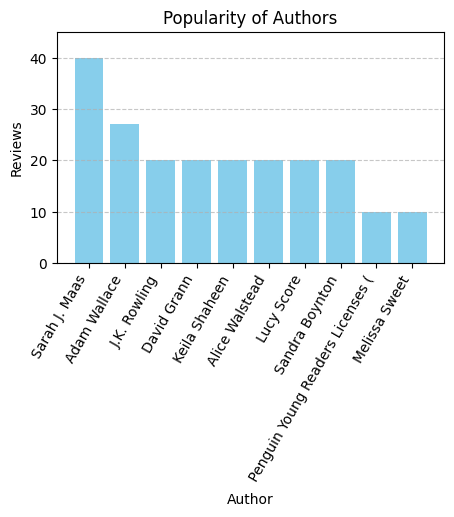

In [20]:
# Creating the bar graph
number_of_reviews_copy = number_of_reviews.sort_values('review_count', ascending = False).iloc[0:10]
plt.figure(figsize=(5, 3))
plt.bar(number_of_reviews_copy['author'],number_of_reviews_copy['review_count'], color='skyblue')
plt.xlabel('Author')
plt.ylabel('Reviews')
plt.title('Popularity of Authors')
plt.xticks(rotation=60, ha='right')
plt.ylim(0, 45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

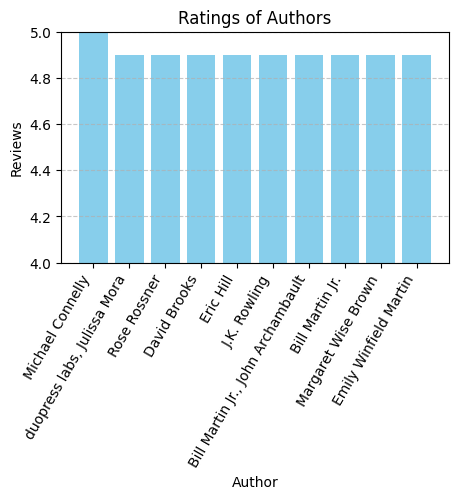

In [19]:
# Creating the bar graph
author_ratings_copy = author_ratings.sort_values('rating', ascending = False).iloc[0:10]
plt.figure(figsize=(5, 3))
plt.bar(author_ratings_copy['author'],author_ratings_copy['rating'], color='skyblue')
plt.xlabel('Author')
plt.ylabel('Reviews')
plt.title('Ratings of Authors')
plt.xticks(rotation=60, ha='right')
plt.ylim(4, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Based on these, we can say


Sarah J. Maas is the most popular and Michael Connelly is highest rated author


---



# 4 Change in Prices with time

In [ ]:
#taking median as central values as the number of books are less and average might be skewed by few outliers

price_by_year = books.groupby('year of publication')['book price'].median().reset_index()
price_by_year.columns = ['Year', 'Median Price']
slope, intercept, r_value, p_value, std_err = linregress(price_by_year['Year'], price_by_year['Median Price'])


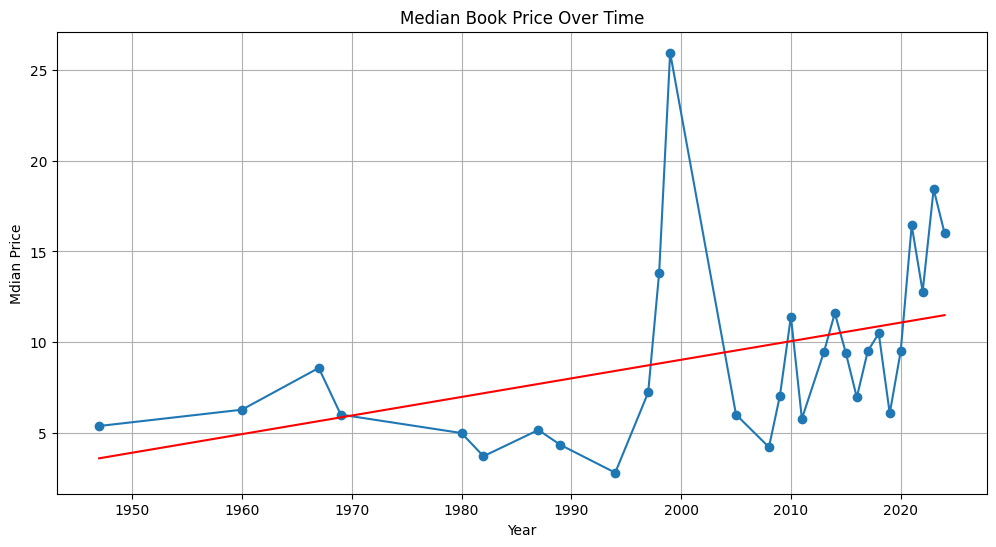

In [ ]:
# Plot the median price over the years
plt.figure(figsize=(12, 6))
plt.plot(price_by_year['Year'], price_by_year['Median Price'], marker='o')
plt.plot(price_by_year['Year'], intercept + slope * price_by_year['Year'], 'r', label='trend line')
plt.xlabel('Year')
plt.ylabel('Mdian Price')
plt.title('Median Book Price Over Time')
plt.grid(True)
plt.show()

1. From this we can notice that the price is rising with the time and now the books are costlier than in past
2. but we will also have to consider that our data has only 1-2 books each year till 2014, which might have sample bias, so data after 2014 may give better insights
3. after 2014, the median prices have fluctuated a bit every year but stayed around $10 a book till 2020 but after that the prices have shot a lot
4. This implies that books prices are have become much costlier in last 3 years

---

# 5. Other Observations

We might also look at the trend in the rating with time

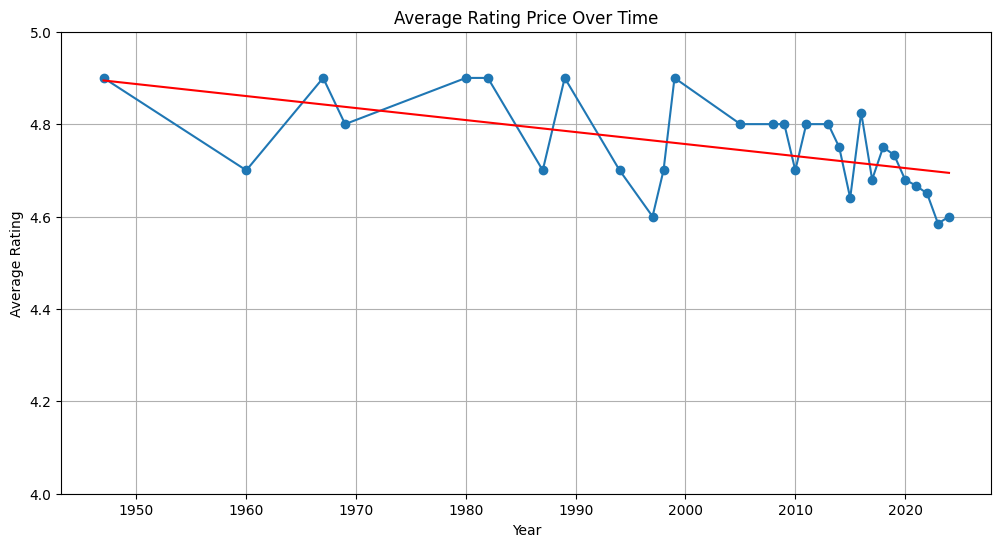

In [ ]:
rating_by_year = books.groupby('year of publication')['rating'].mean().reset_index()
rating_by_year.columns = ['Year', 'Mean Rating']
slope, intercept, r_value, p_value, std_err = linregress(rating_by_year['Year'], rating_by_year['Mean Rating'])


# Plot the average rating price over the years
plt.figure(figsize=(12, 6))
plt.plot(rating_by_year['Year'], rating_by_year['Mean Rating'], marker='o')
plt.plot(rating_by_year['Year'], intercept + slope * rating_by_year['Year'], 'r', label='trend line')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.ylim(4, 5)  # Set the y-axis limits
plt.title('Average Rating Price Over Time')
plt.grid(True)
plt.show()

Here we can we clearly see a declining trend in ratings over the time. Books in the past were much highly rated than today



lets look at the distribution of the ratings


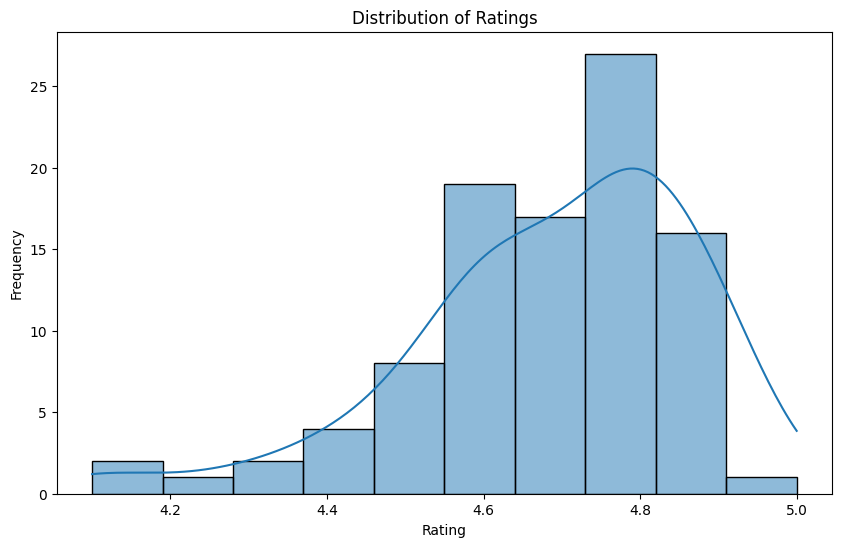

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(books['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

We can notice here that the ratings are mostly given between 4.6 to 4.9 for the books and 4.8 being the most common rating for books